<a href="https://colab.research.google.com/github/rohan1827/Lip-lense/blob/develop/Liplense_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from typing import List
import imageio
import cv2
#

In [27]:
import os

In [4]:
# tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
# if GPU is available
# tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# import shutil
# import zipfile
# import os

# zip_file_path = '/content/drive/MyDrive/videos1.zip'  # Update the path

# extract_to = '/content/extracted_files'

# os.makedirs(extract_to, exist_ok=True)

# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_to)

# print(f'Files extracted to: {extract_to}')


Mounted at /content/drive


In [2]:
!git clone https://github.com/rohan1827/Lip-lense.git


Cloning into 'Lip-lense'...
remote: Enumerating objects: 2025, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 2025 (delta 4), reused 13 (delta 0), pack-reused 2006 (from 1)
Receiving objects: 100% (2025/2025), 408.48 MiB | 25.00 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (2006/2006), done.


In [7]:
import os
os.chdir('/content/Lip-lense')

In [8]:
!ls /content/Lip-lense

demo-data  LICENSE  notebooks  README.md  videos.zip  Weekly-udates


In [9]:
!ls /content/Lip-lense/demo-data

s1  videos


In [3]:
# copying videos and alignments to different folders
!cp -r '/content/Lip-lense/demo-data/videos/s1' /content/videosFiles/
!cp -r '/content/Lip-lense/demo-data/s1' /content/alignmentsFiles/

In [4]:
!ls

alignmentsFiles  Lip-lense  sample_data  videosFiles


In [58]:
def load_video(path:str) -> List[float]:
  cap = cv2.VideoCapture(path)
  frames = []
  for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
    ret, frame = cap.read()
    frame = tf.image.rgb_to_grayscale(frame)
    # crpping
    frames.append(frame[190:236,80:220,:])

    # frames.append(frame)
  cap.release()

  mean = tf.math.reduce_mean(frames)
  std = tf.math.reduce_std(tf.cast(frames, tf.float32))
  return tf.cast((frames - mean), tf.float32) / std

In [6]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [8]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True)
print(char_to_num.get_vocabulary())
print(char_to_num.vocabulary_size())

['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' ']
40


In [11]:
# char_to_num(['a', 'b', 'c', 'z','1'])

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([ 1,  2,  3, 26, 30])>

In [12]:
def load_alignments(path:str) -> List[str]:
    with open(path, 'r') as f:
        lines = f.readlines()
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil':
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [50]:
def load_data(path: str):
    path = bytes.decode(path.numpy())
    # in linus need to use forward slash
    file_name = path.split('/')[-1].split('.')[0]
    # File name splitting for windows
    # file_name = path.split('\\')[-1].split('.')[0]
    # mention the folder of videos and alignments
    video_path = os.path.join('/content','videosFiles',f'{file_name}.mpg')
    alignment_path = os.path.join('/content','alignmentsFiles',f'{file_name}.align')
    frames = load_video(video_path)
    alignments = load_alignments(alignment_path)

    return frames, alignments

In [17]:
test_path = '/content/videosFiles/bbaf2n.mpg'


In [14]:
# !ls //content//Lip-lense

demo-data/  LICENSE  notebooks/  README.md  Weekly-udates/


In [19]:
tf.convert_to_tensor(test_path).numpy()

b'/content/videosFiles/bbaf2n.mpg'

In [20]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8')

'/content/videosFiles/bbaf2n.mpg'

In [25]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('/')

['', 'content', 'videosFiles', 'bbaf2n.mpg']

In [24]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('/')[-1].split('.')[0]


'bbaf2n'

In [31]:
path = tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('/')[-1].split('.')[0]


In [32]:
# os.path.join('content','videosFiles',f'{path}.mpg')

'content/videosFiles/bbaf2n.mpg'

In [49]:
# os.path.join('/content','videosFiles')

'/content/videosFiles'

In [59]:
# we will load the alignment and video for this perticular file
load_data(tf.convert_to_tensor('bbal6n'))

(<tf.Tensor: shape=(75, 46, 140, 1), dtype=float32, numpy=
 array([[[[ 1.4603736 ],
          [ 1.4603736 ],
          [ 1.4209042 ],
          ...,
          [ 0.15787823],
          [ 0.19734779],
          [ 0.07893912]],
 
         [[ 1.4603736 ],
          [ 1.4603736 ],
          [ 1.4209042 ],
          ...,
          [ 0.15787823],
          [ 0.07893912],
          [ 0.03946956]],
 
         [[ 1.4209042 ],
          [ 1.4209042 ],
          [ 1.3814346 ],
          ...,
          [ 0.07893912],
          [ 0.07893912],
          [ 0.07893912]],
 
         ...,
 
         [[ 0.9472694 ],
          [ 0.9472694 ],
          [ 0.9472694 ],
          ...,
          [ 9.946329  ],
          [ 9.86739   ],
          [ 9.86739   ]],
 
         [[ 0.9472694 ],
          [ 0.9472694 ],
          [ 0.9472694 ],
          ...,
          [ 9.906859  ],
          [ 9.86739   ],
          [ 9.86739   ]],
 
         [[ 0.9472694 ],
          [ 0.9472694 ],
          [ 0.9472694 ],
          

In [60]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))


In [53]:
len(frames)

75

In [54]:
len(alignments)

21

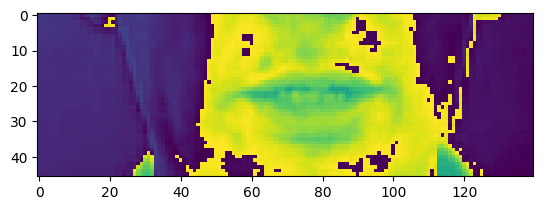

In [68]:
plt.imshow(frames[51])


In [62]:
alignments


<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39,  6, 39, 20, 23, 15,
       39, 14, 15, 23])>

In [70]:
num_to_char(alignments)

<tf.Tensor: shape=(21,), dtype=string, numpy=
array([b'b', b'i', b'n', b' ', b'b', b'l', b'u', b'e', b' ', b'a', b't',
       b' ', b'f', b' ', b't', b'w', b'o', b' ', b'n', b'o', b'w'],
      dtype=object)>

In [73]:
num_to_char(alignments.numpy())

<tf.Tensor: shape=(21,), dtype=string, numpy=
array([b'b', b'i', b'n', b' ', b'b', b'l', b'u', b'e', b' ', b'a', b't',
       b' ', b'f', b' ', b't', b'w', b'o', b' ', b'n', b'o', b'w'],
      dtype=object)>

In [69]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])


<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at f two now'>

In [74]:

def mappable_function(path:str) ->List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

In [ ]:
# Data pipeline

In [84]:
data = tf.data.Dataset.list_files('/content/videosFiles/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
# pick data as a batch of two
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)


In [85]:
# get the next files using iteration
frames,alignments = data.as_numpy_iterator().next()

In [87]:
alignments

array([[ 2,  9, 14, 39, 23,  8,  9, 20,  5, 39,  9, 14, 39, 13, 39, 19,
         5, 22,  5, 14, 39,  1,  7,  1,  9, 14,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  9, 14, 39,  7, 18,  5,  5, 14, 39,  1, 20, 39,  8, 39, 20,
         8, 18,  5,  5, 39,  1,  7,  1,  9, 14,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0]])

In [88]:
len(frames)

2

In [89]:
val = data.as_numpy_iterator().next()

In [92]:
val[1][0]

array([16, 12,  1,  3,  5, 39,  7, 18,  5,  5, 14, 39, 23,  9, 20,  8, 39,
       12, 39, 20,  8, 18,  5,  5, 39,  1,  7,  1,  9, 14,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0])

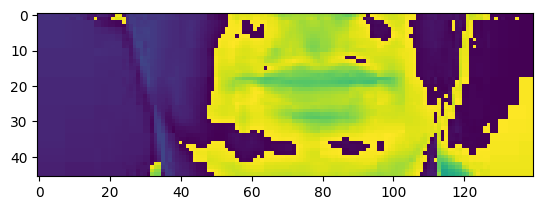

In [95]:
# index 0  -> video or alignement, index 1 - > batch 1 or 2-> index 3 frames for videos or vocab for alignments
plt.imshow(val[0][0][0])

In [96]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'place green with l three again'>

In [97]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][1]])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue in e eight now'>

In [106]:
# sample = val[0][0]

In [108]:
# sample = [np.array(val[0][0], dtype=np.uint8)]

In [111]:
# imageio.mimsave('./animation.gif', sample,fps =10)